### Imports

In [29]:
import numpy as np
import cvxpy as cp 
np.set_printoptions(suppress=True)

Define constants

In [30]:
# simulation parameters
N = 40                  # number of time steps
T = 1                   # final time
h = T / (N + 1)         # step size

# problem data
(x0, y0) = (0, 0)       # initial position
(v0, w0) = (4, 0)       # initial velocity
(P0, Q0) = (0, 0)       # initial applied force
(xf, yf) = (-1, 2)      # final position
(vf, wf) = (0, 0)       # final velocity

Define optimization variables

In [31]:
# variables
x = cp.Variable(N+2) # x position
y = cp.Variable(N+2)  # y position
v = cp.Variable(N+2)  # x velocity
w = cp.Variable(N+2)  # y velocity
P = cp.Variable(N+2)  # x force
Q = cp.Variable(N+2)  # y force

# variable vector
d = cp.hstack([x, y, v, w, P, Q])

Define constraints

In [32]:
# n = 0 ... N
A = (-np.eye(N+3) + np.eye(N+3, k=1))[:-2, :-1]
Ah = (-h * np.eye(N+3, k=1))[:-2, :-1]

# (5): -xn + xn+1 - hvn+1 = 0
dx = A @ x + Ah @ v

# (6): -yn + yn+1 - hwn+1 = 0
dy = A @ y + Ah @ w

# (7): -vn + vn+1 - hPn+1 = 0
dv = A @ v + Ah @ P

# (8): -wn + wn+1 - hQn+1 = 0
dw = A @ w + Ah @ Q

# dynamics
constraints = [dx == 0, dy == 0, dv == 0, dw == 0]

# start conditions
constraints += [x[0] == x0, y[0] == y0, v[0] == v0, w[0] == w0, P[0] == P0, Q[0] == Q0]

# stop conditions
constraints += [x[-1] == xf, y[-1] == yf, v[-1] == vf, w[-1] == wf]

# inequality constraint (9): xn + yn <= 3
constraints += [x + y <= 3]

Define objective

In [33]:
# objective function
obj = cp.Minimize(h*cp.sum_squares(P[1:]) + h*cp.sum_squares(Q[1:]))

Define optimization problem

In [34]:
# solve problem
prob = cp.Problem(obj, constraints)
prob.solve(solver='MOSEK')

# print results
print("status:", prob.status)
print("optimal value:", prob.value)

status: optimal
optimal value: 168.6071425209914


Plot solution

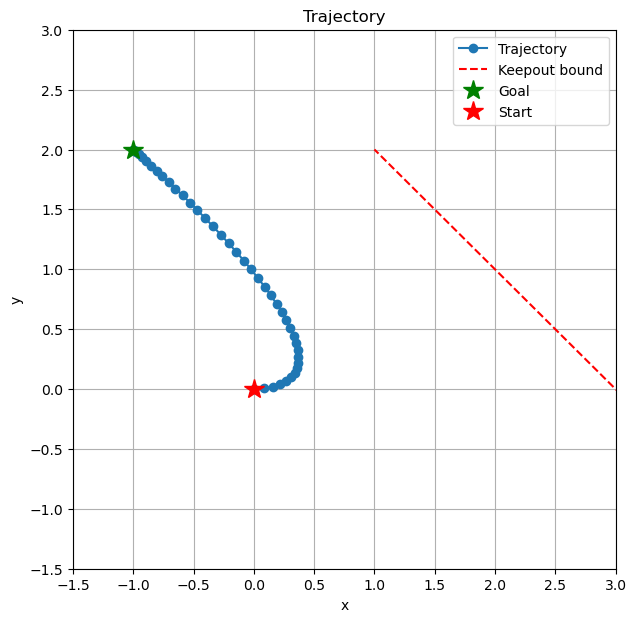

In [35]:
# plot results
import matplotlib.pyplot as plt

# plot trajectory
plt.figure(figsize=(7, 7))
plt.plot(x.value, y.value, 'o-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectory')

# plot inequality constraint
plt.plot([4, 1], [-1, 2], 'r--')
plt.ylim([-1.5, 3])
plt.xlim([-1.5, 3])
plt.grid()
plt.plot(xf, yf, 'g*', markersize=15)
plt.plot(x0, y0, 'r*', markersize=15)
plt.legend(['Trajectory', 'Keepout bound', 'Goal', 'Start'])
plt.show()